<img style="float:right" width="25%" src="EscudoColorTc.jpg">
<h1 style="display: inline-block; padding: 4mm; padding-left= 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px">

    Práctica 5: Recomendación basada en modelos
</h1>

## Gestión de la Información. Curso 2025-2026

## Alumnos:
### Belén Rodríguez Cánovas
### Fernando Arroyo Redondo
___

In [1]:
# Se importa la librería numpy que se va a usar para los vectores que se van a usar
import numpy as np
# Se importa la librería pandas para importar los ficheros csv que se van a necesitar
import pandas as pd
# Se importa la librería pyplot para la creación de gráficos
import matplotlib.pyplot as plt
# Se importa las librerías de sklearn que permiten hacer imágenes de clusters
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Diccionario de datos de usuarios y valoraciones
# Se almacena usando un Dataframe de pandas transformado luego en diccionario
# El fichero se ha creado usando los ficheros proporcionados en el enlace del problema
# Posteriormente se ha unificado en un fichero dataset.xlxs con los campos siguientes:
# userId, movieId, Title, rating

# 1 Carga en el dataframe
df = pd.read_excel('dataset.xlsx')

In [7]:
# 2 Se convierte el dataframe en diccionario
critics = {
    user_id:dict(zip(user_data['Title'],user_data['rating']))
    for user_id, user_data in df.groupby('userId')
}

In [8]:
# Visualización de los datos
critics[1] # Valoración usuario 1, devuelve un diccionario de datos del usuario


{'Toy Story (1995)': 4.0,
 'Grumpier Old Men (1995)': 4.0,
 'Heat (1995)': 4.0,
 'Seven (a.k.a. Se7en) (1995)': 5.0,
 'Usual Suspects, The (1995)': 5.0,
 'From Dusk Till Dawn (1996)': 3.0,
 'Bottle Rocket (1996)': 5.0,
 'Braveheart (1995)': 4.0,
 'Rob Roy (1995)': 5.0,
 'Canadian Bacon (1995)': 5.0,
 'Desperado (1995)': 5.0,
 'Billy Madison (1995)': 5.0,
 'Clerks (1994)': 3.0,
 'Dumb & Dumber (Dumb and Dumber) (1994)': 5.0,
 'Ed Wood (1994)': 4.0,
 'Star Wars: Episode IV - A New Hope (1977)': 5.0,
 'Pulp Fiction (1994)': 3.0,
 'Stargate (1994)': 3.0,
 'Tommy Boy (1995)': 5.0,
 'Clear and Present Danger (1994)': 4.0,
 'Forrest Gump (1994)': 4.0,
 'Jungle Book, The (1994)': 5.0,
 'Mask, The (1994)': 4.0,
 'Blown Away (1994)': 3.0,
 'Dazed and Confused (1993)': 4.0,
 'Fugitive, The (1993)': 5.0,
 'Jurassic Park (1993)': 4.0,
 'Mrs. Doubtfire (1993)': 3.0,
 "Schindler's List (1993)": 5.0,
 'So I Married an Axe Murderer (1993)': 4.0,
 'Three Musketeers, The (1993)': 4.0,
 'Tombstone (1993)'

In [9]:
# Creacion de un subset de menor tamaño (hay 610 usuarios y 9719 películas) para su uso en este ejercicio
# Los 10 usuarios se van a seleccionar de manera aleatoria.
# Las 15 películas se seleccionan de forma fija (ya que se pide evaluar 'Toys Story')
# Array usuarios
selec_usuarios = [1,12,25,102, 135, 201, 289, 346, 598, 600]
# Array películas
selec_peliculas = ['Toy Story (1995)','Three Musketeers, The (1993)', 'Winnie the Pooh and the Blustery Day (1968)', 
                'Platoon (1986)', 'Basic Instinct (1992)', 'Apocalypse Now (1979)', 'Back to the Future (1985)',
                'Indiana Jones and the Temple of Doom (1984)', 'Matrix, The (1999)', 'Star Wars: Episode I - The Phantom Menace (1999)',
                'Django Unchained (2012)', 'Casablanca (1942)', 'Fish Called Wanda, A (1988)', 'Bonnie and Clyde (1967)',
                'Charlie and the Chocolate Factory (2005)']

In [10]:
def creacion_grupo_reducido(usuarios,peliculas,principal):
    
    # seleccion = {'userId':{'Title':{'rating'}}}
    seleccion ={}
    for user in usuarios:
        for peli in peliculas:
            if peli in critics[user] and user not in seleccion:
                seleccion[user]={peli:critics[user][peli]}
               
            if peli in critics[user] and user in seleccion:
                seleccion[user].update({peli:critics[user][peli]})
    return seleccion    
            

In [11]:
selec_critics = creacion_grupo_reducido(selec_usuarios,selec_peliculas,critics)

In [12]:
# Valoracián de una película en particular usuario 1
critics[1]['Toy Story (1995)'] # Valoración usuario A película 'Toy Story'

4.0

In [ ]:
# Solamente para comprobar que se ha efectuado la selección
print(selec_critics)
      

In [13]:
# Valoracián de una película en particular usuario 1 
selec_critics[1]['Toy Story (1995)'] # Valoración usuario A película 'Toy Story'

4.0

In [14]:
# Función para pasar del diccionario a las matrices Y(ratings), R(películas vistas)
def dic_ratings2arrays(dic):
    # Usuarios
    k1=np.unique(list(dic.keys())) #array usuarios
    
    # Películas
    k2=[]
    for i in k1:
        k2=k2 + list(dic[i].keys())

    k2=np.unique(k2) # array de películas

    # Valoraciones
    Y= np.zeros ((len(k1),len(k2))) #array de ratins creado  a cero
    # Relleno de valores de Y, recorriendo los dos vectores de usuarios y películas
    for i in k1:
        for j in k2:
            if j in dic[i].keys():
                Y[k1.tolist().index(i),k2.tolist().index(j)]= dic[i][j]
    return (Y,(Y>0)*1,k1,k2) #La matriz R es (Y>0)*1

In [15]:
# Añadir dos usuarios nuevos con sus películas vistas

selec_critics[611] = {'Toy Story (1995)':4.7,'Three Musketeers, The (1993)':4.3, 'Winnie the Pooh and the Blustery Day (1968)':4.5, 'Back to the Future (1985)':4.0,'Indiana Jones and the Temple of Doom (1984)':4.0, 'Charlie and the Chocolate Factory (2005)':4.5}
selec_critics[612] = {'Toy Story (1995)':3.5,'Three Musketeers, The (1993)':3.2, 'Platoon (1986)':4.5, 'Basic Instinct (1992)':4.6, 'Apocalypse Now (1979)':4.0,'Indiana Jones and the Temple of Doom (1984)':4.0, 'Matrix, The (1999)':4.8, 'Django Unchained (2012)':4.5, 'Casablanca (1942)':4.0, 'Fish Called Wanda, A (1988)':3.9}


In [16]:
print(selec_critics)

{1: {'Toy Story (1995)': 4.0, 'Three Musketeers, The (1993)': 4.0, 'Winnie the Pooh and the Blustery Day (1968)': 5.0, 'Platoon (1986)': 4.0, 'Basic Instinct (1992)': 5.0, 'Apocalypse Now (1979)': 4.0, 'Back to the Future (1985)': 5.0, 'Indiana Jones and the Temple of Doom (1984)': 5.0, 'Matrix, The (1999)': 5.0, 'Star Wars: Episode I - The Phantom Menace (1999)': 4.0}, 25: {'Matrix, The (1999)': 5.0}, 102: {'Three Musketeers, The (1993)': 3.0}, 135: {'Toy Story (1995)': 4.0, 'Indiana Jones and the Temple of Doom (1984)': 4.0, 'Matrix, The (1999)': 5.0, 'Star Wars: Episode I - The Phantom Menace (1999)': 2.0, 'Casablanca (1942)': 4.0}, 201: {'Toy Story (1995)': 5.0, 'Back to the Future (1985)': 5.0, 'Indiana Jones and the Temple of Doom (1984)': 5.0, 'Star Wars: Episode I - The Phantom Menace (1999)': 3.0}, 289: {'Apocalypse Now (1979)': 4.0}, 346: {'Apocalypse Now (1979)': 4.5, 'Casablanca (1942)': 4.5}, 600: {'Toy Story (1995)': 2.5, 'Three Musketeers, The (1993)': 3.5, 'Back to the 

In [17]:
#Creacián de matrices 
(Y,R,users,movies)=dic_ratings2arrays(selec_critics)


In [19]:
# Función de costes
def funcCostes(parametros, Y, R, num_usuarios,num_peli, num_caract, lamb):
    # parametros es un vectorcon las pliegues de las matrices X y Theta 
    # Y es la matriz de valoraciones
    # R es la matriz de las películas que se han visto
    # num_usuarios es el número de usuarios que se corresponde con el de columnas de Y
    # num_peli es el número de películas que se corresponde con las filas de Y
    # num_caract es el número de características de las películas
    # lamb es el término usado para la regularización
    cost = 0 # inicialización de la variable de costes
    gradiente=np.zeros_like(parametros) # inicialización del gradiente
    
    x = np.matrix(np.reshape(parametros[:num_peli*num_caract],(num_peli,num_caract)))
    gradiente_x = np.zeros(x.shape)

    theta = np.matrix(np.reshape(parametros[num_peli*num_caract:], (num_usuarios,num_caract)))
    gradiente_theta = np.zeros(theta.shape)

    error = np.multiply((x*theta.T)-Y,R)
    error_cuadratico = np.power (error,)

    cost = (1/2)*np.sum(error_cuadratico)
    cost += ((lamb/2)*np.sum(np.power(theta,2)))
    cost += ((lamb/2)*np.sum(np.power(x,2)))

    gradiente_x = error*theta + lamb*x
    gradiente_theta = error.T*x + lamb*theta

    gradiente = np.concatenate((np.ravel(gradiente_x),np.ravel(gradiente_theta)))

    return (cost,gradient)
    

In [ ]:
** caracter**
$$=\\begin{bmatrix}x^

In [ ]:
# El algoritmo se basa en dos regresiones lineares, la primera corresponde a las películas X, y la segunda
# a las preferencias de los usuarios Theta

In [18]:
#Visualizacián parcial de datos para ver algunos resultados

print ('Matiz de valoraciones Y\n',Y) # primer usuario
print ('Matriz R\n',R) # primera película
print ('Usuarios\n',users) # 10 primeros usurios
print ('Películas\n',movies)  # 10 primeras películas

Matiz de valoraciones Y
 [[4.  5.  5.  0.  0.  0.  0.  0.  5.  5.  4.  4.  4.  4.  5. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0. ]
 [0.  0.  0.  0.  4.  0.  0.  0.  4.  5.  0.  2.  0.  4.  0. ]
 [0.  5.  0.  0.  0.  0.  0.  0.  5.  0.  0.  3.  0.  5.  0. ]
 [4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [4.5 0.  0.  0.  4.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  4.5 0.  3.5 2.5 3.  0.  3.  3.5 3.  0.  1.  3.5 2.5 0. ]
 [0.  4.  0.  0.  0.  4.5 0.  0.  4.  0.  0.  0.  4.3 4.7 4.5]
 [4.  0.  4.6 0.  4.  0.  4.5 3.9 4.  4.8 4.5 0.  3.2 3.5 0. ]]
Matriz R
 [[1 1 1 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 1 1 0 1 0 1 0]
 [0 1 0 0 0 0 0 0 1 0 0 1 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 1 0 1 1 1 0 1 1 1 0]
 [0 1 0 0 0 1 0 0 1 0 0 0 1 1 1]
 [1 0 1 0 1 0 1 1 1 1 1 0 1 1 0]]
Usu

In [25]:
Y[0,R[0,:]>0].mean() #Media de valoración del usuario 1

np.float64(4.5)

# Se usan los datos nuevamente para el clustering usando usuario, id película y valoración


In [ ]:
# 1. descarga de datos
# df = pd.read_excel('dataset.xlsx')

In [20]:
#2. Crear matriz usuario-película

user_movie_matrix = df.pivot_table(
    index="userId",
    columns="movieId",
    values="rating"
).fillna(0)


In [21]:
# 3. Estandarización de los datos:
# Se hace la estandrización pqra que cada película tenga una media 0 y una desviación estándar 1.
# Esto evita que haya películas con mucha nota que prevalezcan en el cluster.

scaler = StandardScaler()
user_movie_scaled = scaler.fit_transform(user_movie_matrix)


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^

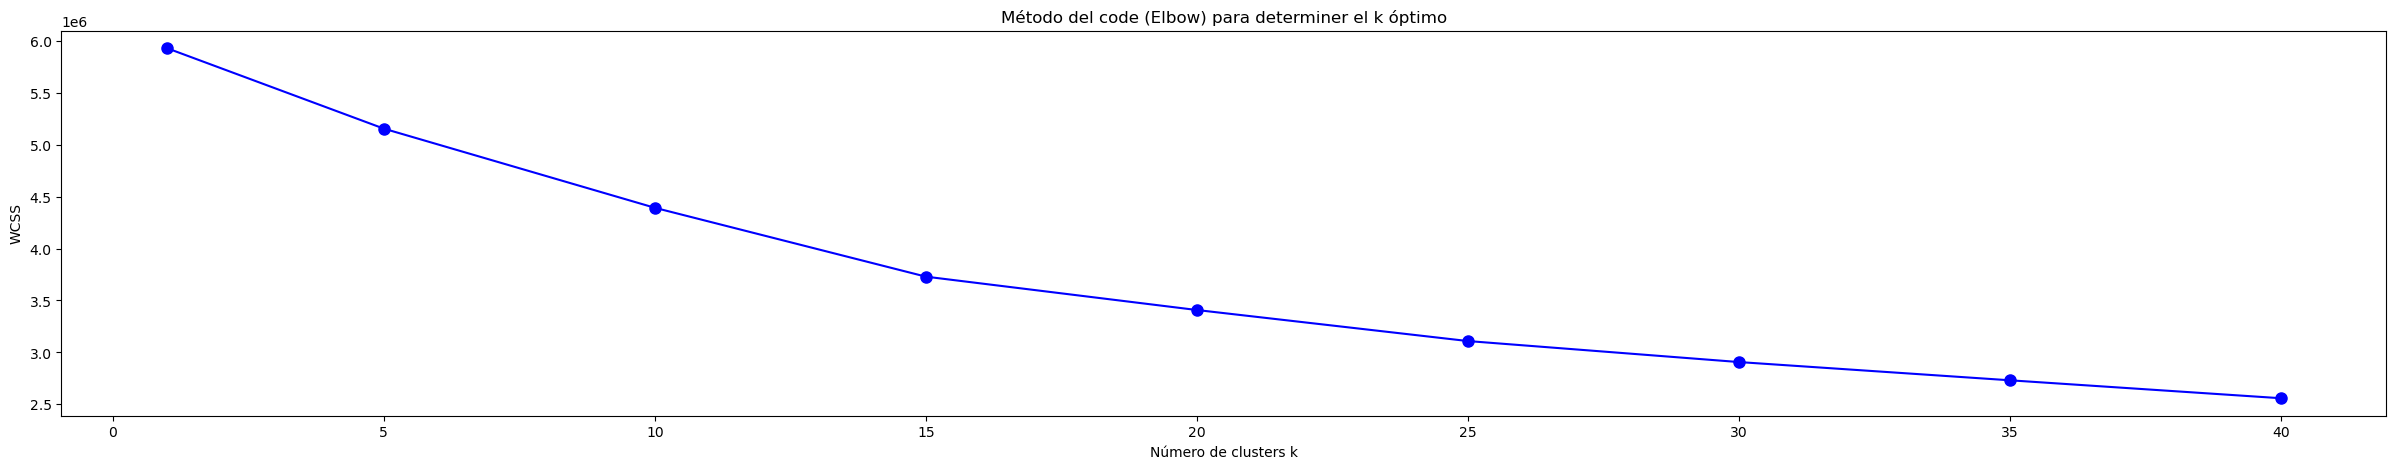

In [22]:
# 4 Determinar el mejor valor de k
wcss = []
K_range = [1,5,10,15,20,25,30,35,40] # Se define un número razonable de clusters que puedan servir

# Se calculan los datos de cluster y centroides
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(user_movie_scaled)
    wcss.append(kmeans.inertia_)

# Visualización del "codo" que indica el mejor k
plt.figure(figsize=(30,5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Número de clusters k')
plt.ylabel('WCSS')
plt.title('Método del code (Elbow) para determiner el k óptimo')
plt.show()

In [23]:
# 5. Aplicar K-Means

n_clusters = 40  # número de clusters ideal, ver 4. 
# A partir del codo 16  Wcss disminuye lentamente y no hay ganancia al añadir más
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(user_movie_scaled)

# Añadir los centroides de los clusters a los usuarios utilisateurs
user_clusters = pd.DataFrame({
    "user_id": user_movie_matrix.index,
    "cluster": clusters
})

# Comprobar el número de usuarios por cluster
print("Cantidad de usuarios por cluster :")
print(user_clusters["cluster"].value_counts())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Cantidad de usuarios por cluster :
cluster
35    543
1      29
38      1
12      1
28      1
3       1
6       1
25      1
31      1
2       1
27      1
19      1
26      1
39      1
4       1
10      1
9       1
11      1
32      1
21      1
20      1
0       1
16      1
15      1
29      1
22      1
14      1
8       1
13      1
24      1
30      1
33      1
37      1
17      1
34      1
23      1
18      1
7       1
36      1
5       1
Name: count, dtype: int64


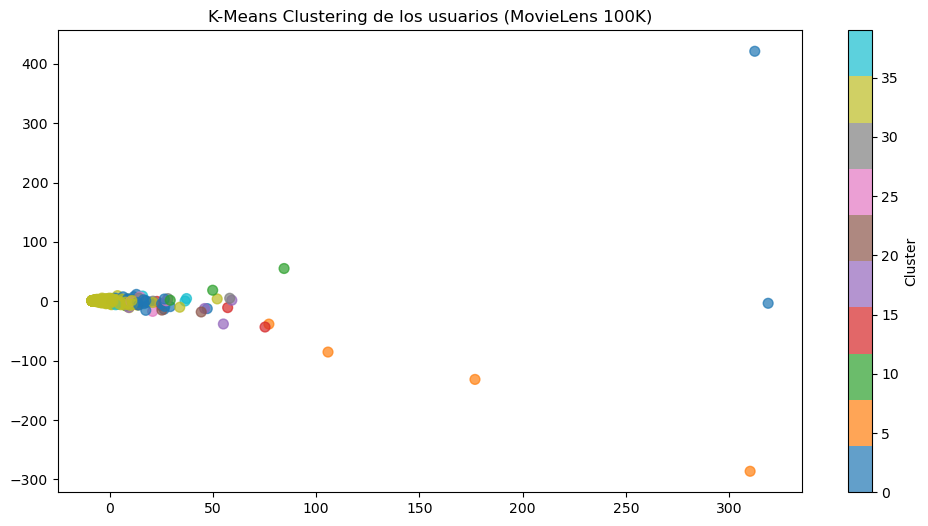

In [24]:
# 5. Reducción de la dimensión para su visualisación en dos dimensiones (usando PCA)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(user_movie_scaled)

plt.figure(figsize=(12, 6))
plt.scatter(
    reduced_data[:, 0],
    reduced_data[:, 1],
    c=clusters,
    cmap="tab10",
    s=50,
    alpha=0.7
)
plt.title("K-Means Clustering de los usuarios (MovieLens 100K)")
plt.xlabel("")
plt.ylabel("")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
#Cálculo de la matriz de similitud
def user_similarity_matrix(Y,R):
    matrix = np.zeros((Y.shape[0],Y.shape[0]))
    for u1 in range (Y.shape[0]):
        for u2 in range (u1,Y.shape[0]):
            matrix[u1,u2] = pearson_similarity(Y,R,u1,u2)
            if u1!=u2:
                matrix[u2,u1]=matrix[u1,u2]
    return matrix

In [ ]:
# Mostrar la matriz
print ('Matriz de similitud\n',user_similarity_matrix(Y,R))

In [ ]:
# Encontrar los k usuarios que evaluaron Toys Storry
item_i=1 # el item 1 corresponde a Marte
k=np.where(R[:,item_i]>0)[0]
print (k)

In [ ]:
# Calcular la similitud de los k usuarios al usuario C
user_sim = user_similarity_matrix(Y,R)
user_u=9 # 2 corresponde al usuario C
k_sim = user_sim[user_u,k]


In [ ]:
print(k_sim)

In [ ]:
# Unir índices de usuarios y similitudes: da una lista de tuplas
# primera posicián de la tupla con la similitud del usuario y de qué usuario se trata en segunda posisión
k_zip = list(zip(k_sim,k))
print ('Usuarios que vieron Toys Story\n', k_zip)

In [ ]:
# Si se quiere eliminar los índices de usuarios con similitud negativa que distorsionan el coeficiente
k_zip=[k_zip[i] for i in range (len(k_zip)) if k_zip[i][0]> 0]
print ('Usuarios con similitud positiva que vieron Toys Story\n',k_zip)

In [ ]:
# Media de las valoraciones del usuario 9 (sobre las películas que si haya visto)
user_u_average=Y[user_u,R[user_u,:]>0].mean()
print(user_u_average)

In [ ]:
# Suma de los valores absolutos de similitud de vecinos próximos al usuario C
k_sim=[k_zip[i][0] for i in range(len(k_zip))]
print(k_sim)
k_sim_suma=np.abs(np.array(k_sim)).sum()
print (k_sim_suma)

In [ ]:
# Estimación de la valoración
rating_user_u_item_i=0
for user_v in [k_zip[i][1] for i in range (len(k_zip))]:
    rating_user_u_item_i += (Y[user_v,item_i] - Y[user_v,R[user_v,:]>0].mean())*user_sim[user_u,user_v]
rating_user_u_item_i = user_u_average + rating_user_u_item_i/k_sim_suma
print('Valoración estimada\n',rating_user_u_item_i)

In [ ]:
# Mostrar la matriz Y\n",
plt.figure(figsize=(10, 15))
plt.matshow(Y, fignum=3, cmap='rainbow')
plt.colorbar(label="Evaluaciones")
plt.title("Matriz de evaluaciones (Y)")
plt.xlabel("Usuarios")
plt.ylabel("Películas")
plt.show()

In [ ]:
# Mostrar la matriz R\n",
plt.figure(figsize=(10, 15))
plt.matshow(R, fignum=2, cmap='coolwarm')
plt.colorbar(label="vista/novista")
plt.title("Matriz R")
plt.xlabel("Usuarios")
plt.ylabel("Películas vistas")
plt.show()

In [ ]:
#Creacián de matrices 
(YA,RA,usersA,moviesA)=dic_ratings2arrays(critics)


In [ ]:
# Agrupación de la población total
plt.style.use('_mpl-gallery-nogrid')
# Usuarios
x = np.unique(list(critics[0].keys())) #array usuarios
y = np.unique(list(critics[0].keys().values()))

# plot:
fig, ax = plt.subplots()

ax.hist2d(x, y, bins=(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1)))

ax.set(xlim=(-2, 2), ylim=(-3, 3))

plt.show()